<a href="https://colab.research.google.com/github/DmitriiDenisov/mlcourse_dubai/blob/master/jupyter_notebooks/Lecture_06_Logistic_Regression/Lecture_06_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <center>Topic 6. Logistic Regression
    
## Article outline
1. [Linear Classifier](#1.-Linear-Classifier)
2. [Mathematical Justification and MLE](#2.-Mathematical-Justification-and-MLE)
3. [$L_2$-Regularization of Logistic Loss](#3.-$L_2$-Regularization-of-Logistic-Loss)
4. [Practice](#4.-Practice)
5. [Demo assignment](#5.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

## 1. Linear Classifier

The basic idea behind a linear classifier two target classes can be separated by a hyperplane in the feature space. If this can be done without error, the training set is called *linearly separable*.

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/logit.png?raw=1"/>

We have already seen linear regression and Ordinary Least Squares (OLS). Let's consider a binary classification problem, and denote target classes to be "+1" (positive examples) and "-1" (negative examples). One of the simplest linear classifiers can be defined using regression as follows:

$$\Large a(\textbf{x}) = w_0 + w_1 x_1 + w_2 x_2 + ... +w_n x_n = \text{sign}(\textbf{w}^\text{T}\textbf x),$$

where
 - $\textbf{x}$ –  is a feature vector (along with identity);
 - $\textbf{w}$ – is a vector of weights in the linear model (with bias $w_0$);
 - $\text{sign}(\bullet)$ – is the signum function that returns the sign of its argument;
 - $a(\textbf{x})$ – is a classifier response for $\textbf{x}$.

Meanwhile in regression there can we infinitely many answers in classification task there may be only finite number of answers. 

In regression task we do not require exact answer, we have measure funtion, meanwhile for Classification task it is much more simplier:

This function is called Accuracy:
$$ \Large
       Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [a(x_i) = y_i]     \to
    \max_w
$$
where $[..]$ is called *indicator* (for example, [13=13] = 1 and [12=13] = 0)

Because we usually solve minimization task then:
$$ \Large
\begin{equation}
\label{eq:errCnt}
    Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [a(x_i) \neq y_i]
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [\text{sign}( w^Tx) \neq y_i]
    \to
    \min_w
\end{equation}
$$

First let's rewrite it in the following way:
$$ \Large
    Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [\underbrace{y_i w^Tx}_{M_i} < 0]
    \to
    \min_w
$$

Here $M_i$ is called **margin**: $M_i = y_i w^T x$
Sign of $M_i $ tells us if it is our prediction is correct or wrong, namely if $M_i < 0$ then our prediction is wrong. The absolute value of it shows us the degree of confidence of our prediction but we will discuss the geometrical explanation of it later

First, I would recommend looking at a classic, introductory problem in linear algebra: find the distance from the point with a radius-vector $\textbf{x}_A$ to a plane defined by the equation $\textbf{w}^\text{T}\textbf{x} = 0.$

Answer:
$$\rho(\textbf{x}_A, \textbf{w}^\text{T}\textbf{x} = 0) = \frac{\textbf{w}^\text{T}\textbf{x}_A}{||\textbf{w}||}$$

<img src='https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/simple_linal_task.png?raw=1' width=60% />

When we get to the answer, we will understand that the greater the absolute value of the expression $\textbf{w}^\text{T}\textbf{x}_\text{i}$, the farther the point $\textbf{x}_\text{i}$ is from the plane $\textbf{w}^\text{T}\textbf{x} = 0.$

Hence, our expression $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ is a kind of "confidence" in our model's classification of the object $\textbf{x}_\text{i}$:

- if the margin is large (in absolute value) and positive, the class label is set correctly, and the object is far away from the separating hyperplane i.e. classified confidently. See Point $x_3$ on the picture;
- if the margin is large (in absolute value) and negative, then class label is set incorrectly, and the object is far from the separating hyperplane (the object is most likely an anomaly; for example, it could be improperly labeled in the training set). See Point $x_1$ on the picture;
- if the margin is small (in absolute value), then the object is close to the separating hyperplane, and the margin sign determines whether the object is correctly classified. See Points $x_2$ and $x_4$ on the plot;

<img src='https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/margin.png?raw=1' width=60% />

### Main idea: hyperplane with $w^Tx = 0$, the closer point is to hyperplane the less is $w^Tx$, the further we are from hyperplane the bigger is $w^Tx$

Let's remind that our loss function is: 
First let's rewrite it in the following way:
$$ \Large
    Q(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [\underbrace{y_i w^Tx}_{M_i} < 0] = \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        [{M_i} < 0]
    \to
    \min_w
$$

Or more short:

$$
\Large
Q(M) = \sum_{i = 1}^{\ell}
        [{M_i} < 0]
    \to
    \min_w
$$


Problem is that this function does not take into account how far is our point from the hyperplane.
Also this is discrete function (not smooth one) that's why it's difficult to solve it with derivatives. In order to solve this problem we will replace our function with another one which will be **smooth** and that's why we will be able to optimize it
So let's make upper bound function for: 
$$
\Large Q(M) \leq \tilde Q(M)
$$

Look at the graph:

<img src='https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/classificationlosses.png?raw=1' width=60% />

$$ \Large
\begin{array}{c}
\tilde L(M) = \log \left(1 + e^{-M} \right) \\\
\tilde L(M) = (1 - M)_+ = \max(0, 1 - M) \\\
\tilde L(M) = e^{-M}
\end{array}
$$

But someone can ask a question: Why do we take this function ?

##  2. Mathematical Justification and MLE

We will again rely on [maximum likelihood estimation ](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

Let's consider **any** binary classification task as a random binary random variable which is:
- with probability $b(x_i)$ it is +1
- with probability $1-b(x_i)$ it is -1

Let's rewrite it in mathematical language, i.e write probability function for this:

$$ \Large P(y | x_i) = b(x_i)^{[y_i = +1]} (1 - b(x_i))^{[y_i = -1]} $$

$$ \Large
    Q(a, X)
    =
    \prod_{i = 1}^{\ell}
        b(x_i)^{[y_i = +1]} (1 - b(x_i))^{[y_i = -1]} \to \max
$$

What is equivalent to:

$$
\Large
\sum_{i = 1}^{\ell} \left(
        [y_i = +1] \log b(x_i)
        +
        [y_i = -1] \log (1 - b(x_i))
    \right)
    \to
    \max
$$

And finally:

$$
\Large
- \sum_{i = 1}^{\ell} \left(
        [y_i = +1] \log b(x_i)
        +
        [y_i = -1] \log (1 - b(x_i))
    \right)
    \to
    \min
$$

This function is called **Log-loss**

Now let's think how about how we are going to implement prediction of probabilities of LogisticRegression

Logistic regression is a special case of the linear classifier, but it has an added benefit of predicting a probability $p_+$ of referring example $\textbf{x}_\text{i}$ to the class "+":
$$\Large p_+ = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Being able to predict not just a response ( "+1" or "-1") but the *probability* of assignment to class "+1" is a very important requirement in many business problems e.g. credit scoring where logistic regression is traditionally used. Customers who have applied for a loan are ranked based on this predicted probability (in descending order) to obtain a scoreboard that rates customers from bad to good. Below is an example of such a toy scoreboard.

<img src='https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/toy_scorecard_eng.png?raw=1' width=60% />

The bank chooses a threshold $p_*$ to predict the probability of loan default (in the picture it's $0.15$) and stops approving loans starting from that value. Moreover, it is possible to multiply this predicted probability by the loan amount to get the expectation of losses from the client, which can also constitute good business metrics (scoring experts may have more to add, but the main gist is this).

To predict the probability $p_+ \in [0,1]$, we can start by constructing a linear prediction using OLS: $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$. But converting the resulting value to the probability within in the [0, 1] range requires some function $f: \mathbb{R} \rightarrow [0,1]$. Logistic regression uses a specific function for this: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$. Now let's understand what the prerequisites are.

<img src='https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/sigmoid.png?raw=1' width=50% />

So, logistic regression predicts the probability of assigning an example to the "+" class (assuming that we know the features and weights of the model) as a sigmoid transformation of a linear combination of the weight vector and the feature vector:

$$\large p_+(\textbf{x}_\text{i}) = P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = b(x_i) $$

Next, we will see how the model is trained

Let's remind that we are going to solve following optimization task:

$$ \Large
- \sum_{i = 1}^{\ell} \left(
        [y_i = +1] \log b(x_i)
        +
        [y_i = -1] \log (1 - b(x_i))
    \right)
    \to
    \min
$$

$$ \Large \begin{align*}
-\sum_{i = 1}^{\ell} &\left(
        [y_i = +1]
        \log \frac{1}{1 + \exp(-\textbf{w}^\text{T}\textbf{x}_\text{i})}
        +
        [y_i = -1]
        \log \frac{\exp(-\textbf{w}^\text{T} \textbf{x}_\text{i})}{1 + \exp(-\textbf{w}^\text{T}\textbf{x}_\text{i})}
    \right)
    =\\
    &=
    -\sum_{i = 1}^{\ell} \left(
        [y_i = +1]
        \log \frac{1}{1 + \exp(-\textbf{w}^\text{T}\textbf{x}_\text{i})}
        +
        [y_i = -1]
        \log \frac{1}{1 + \exp(\textbf{w}^\text{T}\textbf{x}_\text{i})}
    \right)
    =\\
    &=
    \sum_{i = 1}^{\ell}
        \log \left(
            1 + \exp(-y_i \textbf{w}^\text{T}\textbf{x}_\text{i})
        \right) =     \sum_{i = 1}^{\ell}
        \log \left(
            1 + \exp(-M_i)
        \right).
\end{align*} $$

## 3. $L_2$-Regularization of Logistic Loss
$L_2$-regularization of logistic regression is almost the same as in the case of ridge regression. Instead of minimizing the function $\mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w})$ we minimize the following:

$$\Large \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

In the case of logistic regression, a reverse regularization coefficient $C = \frac{1}{\lambda}$ is typically introduced. Then the solution to the problem would be:

$$\Large \widehat{\textbf w}  = \arg \min_{\textbf{w}} \mathcal{J}(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^\text{T}\textbf{x}_\text{i}})+ \frac{1}{C}|\textbf{w}|^2)$$ 

Next, we'll look at an example that allows us to intuitively understand one of the interpretations of regularization.

## 4. Practice

Let's demonstrate how polynomial features allow linear models to build nonlinear separating surfaces. Let's now show this visually.

Let's see how regularization affects the quality of classification on a dataset on microchip testing from Andrew Ng's course on machine learning. We will use logistic regression with polynomial features and vary the regularization parameter $C$. First, we will see how regularization affects the separating border of the classifier and intuitively recognize under- and overfitting. Then, we will choose the regularization parameter to be numerically close to the optimal value via (`cross-validation`) and (`GridSearch`).

In [0]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

Let's load the data using `read_csv` from the `pandas` library. In this dataset on 118 microchips (objects), there are results for two tests of quality control (two numerical variables) and information whether the microchip went into production. Variables are already centered, meaning that the column values have had their own mean values subtracted. Thus, the "average" microchip corresponds to a zero value in the test results.  

In [0]:
# loading data
data = pd.read_csv('../../data/microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# getting some info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


Let's inspect at the first and last 5 lines.

In [0]:
data.head(5)

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [0]:
data.tail(5)

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


Now we should save the training set and the target class labels in separate NumPy arrays.

In [0]:
y = data['released'].values
X = data[['test1', 'test2']].values

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train = X[:90]
X_test = X[90:]
y_train = y[:90]
y_test = y[90:]

In [0]:
a = DecisionTreeClassifier()
a.fit(X_train, y_train)
y_pred = a.predict(X_test)

In [0]:
(y_pred == y_test).sum() / y_pred.shape[0]

0.6071428571428571

As an intermediate step, we can plot the data. Orange points correspond to defective chips, blue to normal ones.

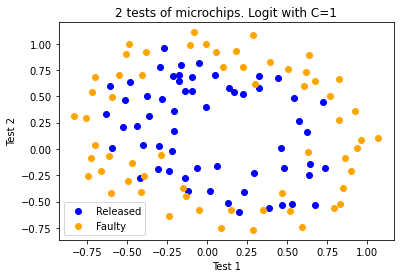

In [0]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=1')
plt.legend();

Let's define a function to display the separating curve of the classifier.

In [0]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

We define the following polynomial features of degree $d$ for two variables $x_1$ and $x_2$:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

For example, for $d=3$, this will be the following features:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

Drawing a Pythagorean Triangle would show how many of these features there will be for $d=4,5...$ and so on.
The number of such features is exponentially large, and it can be costly to build polynomial features of large degree (e.g $d=10$) for 100 variables. More importantly, it's not needed. 


We will use `sklearn`'s implementation of logistic regression. So, we create an object that will add polynomial features up to degree 7 to matrix $X$.

In [0]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [0]:
X_poly.shape

(118, 36)

Let's train logistic regression with regularization parameter $C = 10^{-2}$.

Accuracy on training set: 0.627


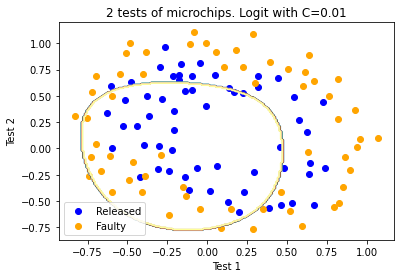

In [0]:
C = 0.01
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

We could now try increasing $C$ to 1. In doing this, we weaken regularization, and the solution can now have greater values (in absolute value) of model weights than previously. Now the accuracy of the classifier on the training set improves to 0.831.

Accuracy on training set: 0.831


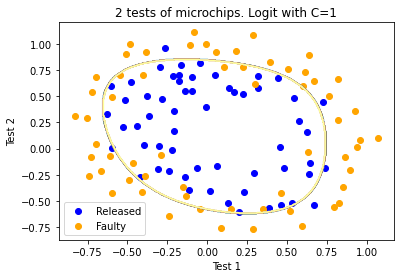

In [0]:
C = 1
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

Then, why don't we increase $C$ even more - up to 10,000? Now, regularization is clearly not strong enough, and we see overfitting. Note that, with $C$=1 and a "smooth" boundary, the share of correct answers on the training set is not much lower than here. But one can easily imagine how our second model will work much better on new data.

Accuracy on training set: 0.873


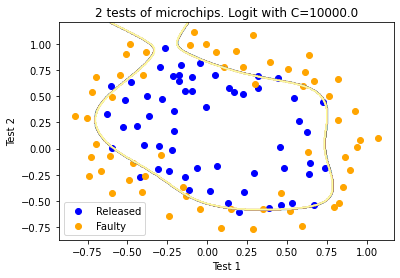

In [0]:
C = 1e4
logit = LogisticRegression(C=C, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Released')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='orange', label='Faulty')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title('2 tests of microchips. Logit with C=%s' % C)
plt.legend();

print("Accuracy on training set:", 
      round(logit.score(X_poly, y), 3))

To discuss the results, let's rewrite the function that is optimized in logistic regression with the form:

$$\large J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

where

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $C$ is the reverse regularization coefficient (the very same $C$ from `sklearn`'s implementation of `LogisticRegression`)

**Subtotals**:
- the larger the parameter $C$, the more complex the relationships in the data that the model can recover (intuitively $C$ corresponds to the "complexity" of the model - model capacity)
- if regularization is too strong i.e. the values of $C$ are small, the solution to the problem of minimizing the logistic loss function may be the one where many of the weights are too small or zeroed. The model is also not sufficiently "penalized" for errors (i.e. in the function $J$, the sum of the squares of the weights "outweighs", and the error $\mathcal{L}$ can be relatively large). In this case, the model will underfit as we saw in our first case.
- on the contrary, if regularization is too weak i.e. the values of $C$ are large, a vector $w$ with high absolute value components can become the solution to the optimization problem. In this case, $\mathcal{L}$ has a greater contribution to the optimized functional $J$. Loosely speaking, the model is too "afraid" to be mistaken on the objects from the training set and will therefore overfit as we saw in the third case.
- logistic regression will not "understand" (or "learn") what value of $C$ to choose as it does with the weights $w$. That is to say, it can not be determined by solving the optimization problem in logistic regression. We have seen a similar situation before -- a decision tree can not "learn" what depth limit to choose during the training process. Therefore, $C$ is the a model hyperparameter that is tuned on cross-validation; so is the max_depth in a tree.

**Regularization parameter tuning**

Using this example, let's identify the optimal value of the regularization parameter $C$. This can be done using `LogisticRegressionCV` - a grid search of parameters followed by cross-validation. This class is designed specifically for logistic regression (effective algorithms with well-known search parameters). For an arbitrary model, use `GridSearchCV`, `RandomizedSearchCV`, or special algorithms for hyperparameter optimization such as the one implemented in `hyperopt`.

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.8s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=1)

In [0]:
logit_searcher.C_

array([150.78450459])

To see how the quality of the model (percentage of correct responses on the training and validation sets) varies with the hyperparameter $C$, we can plot the graph. 

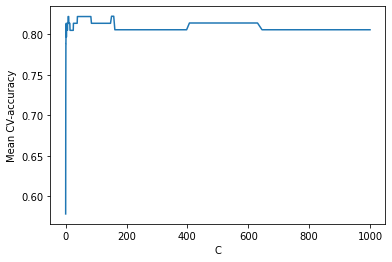

In [0]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

Finally, select the area with the "best" values of $C$.

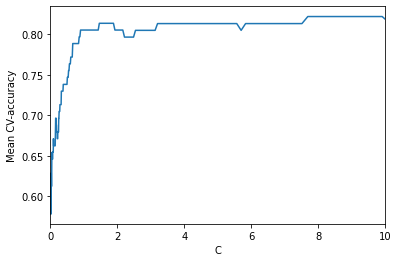

In [0]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,10));

## 5. Demo assignment
To practice with linear models, you can complete [this assignment](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) where you'll build a sarcasm detection model. The assignment is just for you to practice, and goes with [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).

## 6. Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-4-linear-classification-and-regression-44a41b9b5220) based on this notebook
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323890/) on Habr.com with ~ the same material. And a [lecture](https://youtu.be/oTXGQ-_oqvI) on YouTube
- A nice and concise overview of linear models is given in the book ["Deep Learning"](http://www.deeplearningbook.org) (I. Goodfellow, Y. Bengio, and A. Courville).
- Linear models are covered practically in every ML book. We recommend "Pattern Recognition and Machine Learning" (C. Bishop) and "Machine Learning: A Probabilistic Perspective" (K. Murphy).
- If you prefer a thorough overview of linear model from a statistician's viewpoint, then look at "The elements of statistical learning" (T. Hastie, R. Tibshirani, and J. Friedman).
- The book "Machine Learning in Action" (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Search for linear regression and logistic regression.